In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from xgboost import plot_importance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing the data
data = pd.read_csv('/content/drive/MyDrive/Ensemble Learning/Tweets/df_all_features_tfidf.csv', index_col = 0)
data = data.sample(frac=1,random_state=0).reset_index(drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16293,...,0,1,0,0,0,0,0,1,0,0


In [5]:
#dividing the data into train and test set
section = round(len(data)*8/10)
train_df = data.iloc[:section]
test_df = data.iloc[section:]

In [6]:
train_y = train_df.cyberbullying_type

In [7]:
#drop the column agency
columns = list(train_df.drop(['tweet_text',	'cyberbullying_type'], axis=1).columns)

In [8]:
train_x = train_df[columns]

In [10]:
#implementation of XGBoost classifier
model = XGBClassifier()
xg_model = model.fit(train_x, np.ravel(train_y))

In [ ]:
#cv scores
scores = cross_val_score(xg_model, train_x, np.ravel(train_y), cv=5, scoring='f1_macro')

In [ ]:
print(scores)

[0.81572606 0.81694994 0.81641357 0.81417225 0.81414976]


In [ ]:
#average of cv scores
mean_cv_score = np.mean(scores)

In [ ]:
print(mean_cv_score)

0.815482316687738


In [11]:
test_x = test_df[columns]
test_y = test_df.cyberbullying_type

In [12]:
pred_y = xg_model.predict(test_x)

In [13]:
print(classification_report(test_y, pred_y))

                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1585
          ethnicity       0.99      0.98      0.99      1590
             gender       0.94      0.76      0.84      1607
  not_cyberbullying       0.57      0.61      0.59      1584
other_cyberbullying       0.61      0.74      0.67      1561
           religion       0.97      0.93      0.95      1611

           accuracy                           0.83      9538
          macro avg       0.85      0.83      0.84      9538
       weighted avg       0.85      0.83      0.84      9538



In [14]:
pred_y_train = xg_model.predict(train_x)

In [15]:
print(classification_report(train_y, pred_y_train))

                     precision    recall  f1-score   support

                age       0.99      0.98      0.99      6407
          ethnicity       1.00      0.98      0.99      6371
             gender       0.95      0.78      0.86      6366
  not_cyberbullying       0.59      0.62      0.61      6361
other_cyberbullying       0.62      0.75      0.68      6262
           religion       0.97      0.93      0.95      6387

           accuracy                           0.84     38154
          macro avg       0.86      0.84      0.85     38154
       weighted avg       0.86      0.84      0.85     38154



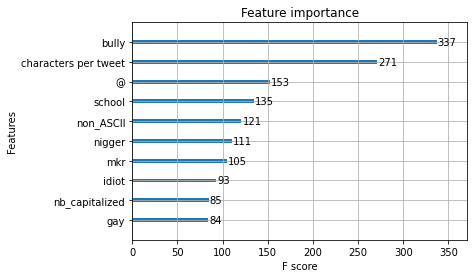

In [ ]:
#plotting the most importan feature for XGBoost classifier
plot_importance(model, max_num_features = 10)
plt.show()

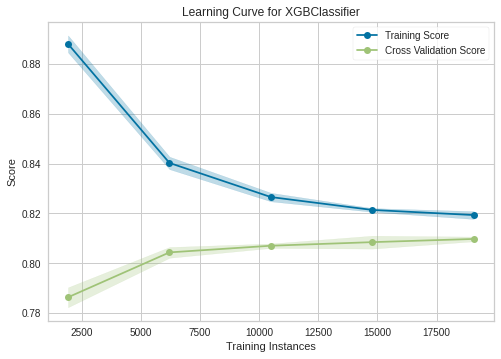

ValueError: ignored

In [ ]:
from yellowbrick.model_selection import learning_curve
## selecting which model to run 
print(learning_curve(model, train_x, train_y, cv=2, scoring='accuracy'))